In [1]:
# Load responses
import tables
resptf = tables.open_file("data/fmri-responses.hf5")
zRresp = resptf.root.zRresp.read()
zPresp = resptf.root.zPresp.read()
mask = resptf.root.mask.read()

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, cm
from tqdm import tqdm

In [3]:
CONTEXTS = range(1,21)

In [4]:
with open('regression_results/embeddings', 'rb') as f:
    regression_results_embedding = dict(pickle.load(f))

In [5]:
with open('regression_results/swapped/layer_4', 'rb') as f:
    regression_results_4 = dict(pickle.load(f))
with open('regression_results/swapped/layer_8', 'rb') as f:
    regression_results_8 = dict(pickle.load(f))
with open('regression_results/swapped/layer_12', 'rb') as f:
    regression_results_12 = dict(pickle.load(f))

In [6]:
print(regression_results_embedding.keys())
print(regression_results_4.keys())
print(regression_results_8.keys())
print(regression_results_12.keys())

dict_keys(['wt', 'corr', 'alphas', 'bscorrs', 'valinds', 'pred'])
dict_keys(['pred'])
dict_keys(['pred'])
dict_keys(['pred'])


In [7]:
voxcorrs = np.zeros((zPresp.shape[1],)) # create zero-filled array to hold correlations
voxcorrsCONTEXT_4 = [np.zeros((zPresp.shape[1],)) for context in CONTEXTS] # create zero-filled array to hold correlations
voxcorrsCONTEXT_8 = [np.zeros((zPresp.shape[1],)) for context in CONTEXTS] # create zero-filled array to hold correlations
voxcorrsCONTEXT_12 = [np.zeros((zPresp.shape[1],)) for context in CONTEXTS] # create zero-filled array to hold correlations
for vi in tqdm(range(zPresp.shape[1])):
    voxcorrs[vi] = np.corrcoef(zPresp[:,vi], regression_results_embedding['pred'][:,vi])[0,1]
    for context in CONTEXTS:
        voxcorrsCONTEXT_4[context-1][vi] = np.corrcoef(zPresp[:,vi], regression_results_4['pred'][context-1][:,vi])[0,1]
        voxcorrsCONTEXT_8[context-1][vi] = np.corrcoef(zPresp[:,vi], regression_results_8['pred'][context-1][:,vi])[0,1]
        voxcorrsCONTEXT_12[context-1][vi] = np.corrcoef(zPresp[:,vi], regression_results_12['pred'][context-1][:,vi])[0,1]

100%|██████████| 37226/37226 [14:23<00:00, 43.11it/s]


In [8]:
x_axis = np.arange(1, 21)
# get overall model performance
y_axis = np.ones(20)*np.mean(voxcorrs)
y_axisCONTEXT_4 = [np.mean(voxcorrsCONTEXT_4[context-1]) for context in CONTEXTS]
y_axisCONTEXT_8 = [np.mean(voxcorrsCONTEXT_8[context-1]) for context in CONTEXTS]
y_axisCONTEXT_12 = [np.mean(voxcorrsCONTEXT_12[context-1]) for context in CONTEXTS]

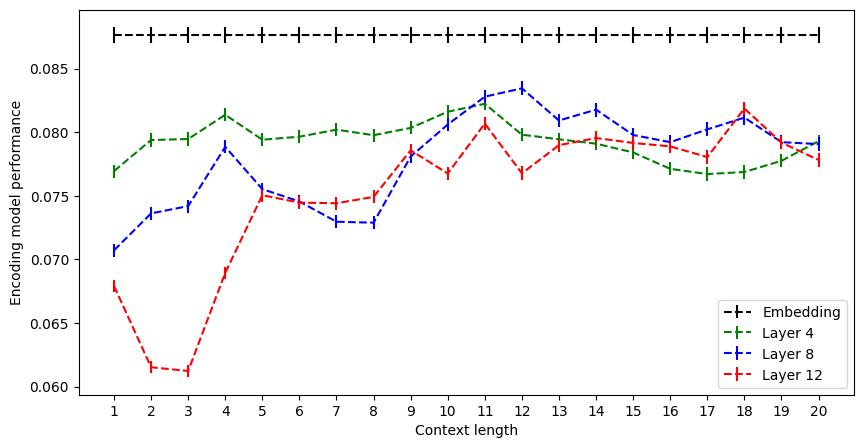

In [9]:
# get rms model performance
# y_axis = np.ones(20)*np.sqrt(np.mean(voxcorrs**2, axis=0))

# get adjusted standard error
e_axis = np.ones(20)*(np.std(voxcorrs) / np.sqrt(len(voxcorrs)))
e_axisCONTEXT_4 = [(np.std(voxcorrsCONTEXT_4[context-1]) / np.sqrt(len(voxcorrsCONTEXT_4[context-1]))) for context in CONTEXTS]
e_axisCONTEXT_8 = [(np.std(voxcorrsCONTEXT_8[context-1]) / np.sqrt(len(voxcorrsCONTEXT_8[context-1]))) for context in CONTEXTS]
e_axisCONTEXT_12 = [(np.std(voxcorrsCONTEXT_12[context-1]) / np.sqrt(len(voxcorrsCONTEXT_12[context-1]))) for context in CONTEXTS]
# plot model performance
f = figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

ax.set_xticks(x_axis)
ax.set_xlabel("Context length")
ax.set_ylabel("Encoding model performance")
basic = ax.errorbar(x_axis, y_axis, e_axis, color='black', linestyle='--',label = 'Embedding')
layer4 = ax.errorbar(x_axis, y_axisCONTEXT_4, e_axisCONTEXT_4, color='green', linestyle='--',label = 'Layer 4')
layer8 = ax.errorbar(x_axis, y_axisCONTEXT_8, e_axisCONTEXT_8, color='blue', linestyle='--',label = 'Layer 8')
layer12 = ax.errorbar(x_axis, y_axisCONTEXT_12, e_axisCONTEXT_12, color='red', linestyle='--',label = 'Layer 12')

ax.legend()